In [1]:
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
import pandas as pd

store_data = pd.read_csv("점포.csv")
sale_data = pd.read_csv("매출.csv")
store_data = store_data.drop('Unnamed: 0', axis=1)
sale_data = sale_data.drop('Unnamed: 0', axis=1)

store_data.columns = ['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률',
       '폐업_점포_수', '프랜차이즈_점포_수']
sale_data.columns = ['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

In [3]:
sale_store = pd.merge(sale_data, store_data, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'])

In [4]:
# sale_store.to_csv('merged.csv')

In [5]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [6]:
sale_store.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,D,발달상권,3120050,서울숲역,100010,커피-음료,2.287190e+08,16371.0,1.738412e+08,54877841.0,27131928.0,30802664.0,38721053.0,42567208.0,34618338.0,31681570.0,23196271.0,0.0,30029526.0,1.009188e+08,8.046891e+07,17301747.0,0.0,55352029.0,8.046328e+07,235279.0,38684730.0,59255161.0,21261959.0,10327195.0,6.050981e+06,13980.0,2391.0,2117.0,2651.0,3091.0,3177.0,2944.0,1194.0,1197.0,0.0,2478.0,7312.0,5488.0,1093.0,0.0,4377.0,6536.0,20.0,3418.0,4305.0,2012.0,876.0,280.0,13.0,15.0,0.0,0.0,0.0,0.0,2.0
1,20231,D,발달상권,3120054,어린이대공원역,100007,치킨전문점,4.346601e+08,32664.0,3.109777e+08,123682435.0,18830029.0,65737534.0,71800527.0,67085488.0,87524125.0,69677197.0,54005238.0,61929251.0,2043353.0,0.000000e+00,3.096274e+07,182340254.0,157384545.0,247326205.0,1.671208e+08,2643234.0,193577246.0,112615715.0,36924663.0,52171880.0,1.651427e+07,23933.0,8731.0,983.0,4647.0,6223.0,5353.0,6727.0,4726.0,4005.0,2851.0,56.0,0.0,2510.0,14707.0,12540.0,16367.0,16022.0,310.0,17381.0,8389.0,2017.0,3425.0,865.0,8.0,15.0,13.0,2.0,0.0,0.0,7.0
2,20231,A,골목상권,3110757,양평역 2번,200033,부동산중개업,1.175862e+08,10348.0,5.526550e+07,62320672.0,10582756.0,10582756.0,7055170.0,3527585.0,23517235.0,29396543.0,32924129.0,2351723.0,14110340.0,1.646206e+07,1.175862e+07,49386196.0,23517234.0,51737918.0,6.114481e+07,0.0,43506884.0,62320674.0,7055170.0,0.0,0.000000e+00,4467.0,5881.0,941.0,940.0,706.0,470.0,1410.0,2587.0,3294.0,235.0,1410.0,2352.0,1176.0,3294.0,1881.0,5879.0,4234.0,0.0,4233.0,5174.0,705.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
3,20231,R,전통시장,3130024,남대문시장(자유상가),300009,청과상,2.388089e+09,83111.0,2.116885e+09,271204300.0,336915823.0,228205601.0,320876396.0,571766061.0,659120624.0,271204300.0,0.0,0.0,170627196.0,1.094118e+09,1.032776e+09,90567789.0,0.0,423680295.0,1.742465e+09,0.0,9749012.0,89877008.0,152972376.0,661440257.0,1.252106e+09,70667.0,12444.0,14746.0,11767.0,13445.0,14884.0,15825.0,12444.0,0.0,0.0,5983.0,30353.0,39644.0,7131.0,0.0,19045.0,58860.0,0.0,1439.0,3624.0,8777.0,16469.0,47593.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
4,20231,A,골목상권,3110496,모래내우체국,300002,편의점,9.283034e+08,130919.0,6.607113e+08,267592127.0,121364674.0,134235734.0,136761922.0,125903909.0,142445062.0,136457325.0,131134802.0,104451040.0,123387615.0,9.936037e+07,1.249447e+08,275939943.0,200219724.0,594021041.0,3.175460e+08,9841321.0,147028424.0,198256651.0,261198165.0,168738374.0,1.265041e+08,94243.0,36676.0,17873.0,18665.0,18931.0,19460.0,19314.0,17669.0,19007.0,12991.0,18938.0,16400.0,16948.0,37257.0,28385.0,84457.0,45523.0,3073.0,26583.0,29399.0,32883.0,22500.0,15542.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0


In [7]:
sale_store['서비스_업종_코드'].unique

<bound method Series.unique of 0        100010
1        100007
2        200033
3        300009
4        300002
5        300014
6        300002
7        200028
8        200001
9        100003
10       100007
11       100003
12       300022
13       200030
14       200007
15       300010
16       300017
17       300002
18       300018
19       200037
20       200016
21       100009
22       200037
23       200016
24       300011
25       100001
26       100010
27       200003
28       200008
29       300018
30       300002
31       200016
32       200003
33       100010
34       200005
35       100007
36       100001
37       200001
38       100004
39       200005
40       200008
41       100007
42       300010
43       200024
44       200008
45       100009
46       300010
47       200037
48       300001
49       200034
50       300002
51       200016
52       300024
53       300004
54       200037
55       300007
56       100008
57       300018
58       100005
59       300018
60       

In [8]:
sale_store['서비스_업종_코드'] = sale_store['서비스_업종_코드'].astype('int64')

In [9]:
sale_store.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,D,발달상권,3120050,서울숲역,100010,커피-음료,2.287190e+08,16371.0,1.738412e+08,54877841.0,27131928.0,30802664.0,38721053.0,42567208.0,34618338.0,31681570.0,23196271.0,0.0,30029526.0,1.009188e+08,8.046891e+07,17301747.0,0.0,55352029.0,8.046328e+07,235279.0,38684730.0,59255161.0,21261959.0,10327195.0,6.050981e+06,13980.0,2391.0,2117.0,2651.0,3091.0,3177.0,2944.0,1194.0,1197.0,0.0,2478.0,7312.0,5488.0,1093.0,0.0,4377.0,6536.0,20.0,3418.0,4305.0,2012.0,876.0,280.0,13.0,15.0,0.0,0.0,0.0,0.0,2.0
1,20231,D,발달상권,3120054,어린이대공원역,100007,치킨전문점,4.346601e+08,32664.0,3.109777e+08,123682435.0,18830029.0,65737534.0,71800527.0,67085488.0,87524125.0,69677197.0,54005238.0,61929251.0,2043353.0,0.000000e+00,3.096274e+07,182340254.0,157384545.0,247326205.0,1.671208e+08,2643234.0,193577246.0,112615715.0,36924663.0,52171880.0,1.651427e+07,23933.0,8731.0,983.0,4647.0,6223.0,5353.0,6727.0,4726.0,4005.0,2851.0,56.0,0.0,2510.0,14707.0,12540.0,16367.0,16022.0,310.0,17381.0,8389.0,2017.0,3425.0,865.0,8.0,15.0,13.0,2.0,0.0,0.0,7.0
2,20231,A,골목상권,3110757,양평역 2번,200033,부동산중개업,1.175862e+08,10348.0,5.526550e+07,62320672.0,10582756.0,10582756.0,7055170.0,3527585.0,23517235.0,29396543.0,32924129.0,2351723.0,14110340.0,1.646206e+07,1.175862e+07,49386196.0,23517234.0,51737918.0,6.114481e+07,0.0,43506884.0,62320674.0,7055170.0,0.0,0.000000e+00,4467.0,5881.0,941.0,940.0,706.0,470.0,1410.0,2587.0,3294.0,235.0,1410.0,2352.0,1176.0,3294.0,1881.0,5879.0,4234.0,0.0,4233.0,5174.0,705.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
3,20231,R,전통시장,3130024,남대문시장(자유상가),300009,청과상,2.388089e+09,83111.0,2.116885e+09,271204300.0,336915823.0,228205601.0,320876396.0,571766061.0,659120624.0,271204300.0,0.0,0.0,170627196.0,1.094118e+09,1.032776e+09,90567789.0,0.0,423680295.0,1.742465e+09,0.0,9749012.0,89877008.0,152972376.0,661440257.0,1.252106e+09,70667.0,12444.0,14746.0,11767.0,13445.0,14884.0,15825.0,12444.0,0.0,0.0,5983.0,30353.0,39644.0,7131.0,0.0,19045.0,58860.0,0.0,1439.0,3624.0,8777.0,16469.0,47593.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
4,20231,A,골목상권,3110496,모래내우체국,300002,편의점,9.283034e+08,130919.0,6.607113e+08,267592127.0,121364674.0,134235734.0,136761922.0,125903909.0,142445062.0,136457325.0,131134802.0,104451040.0,123387615.0,9.936037e+07,1.249447e+08,275939943.0,200219724.0,594021041.0,3.175460e+08,9841321.0,147028424.0,198256651.0,261198165.0,168738374.0,1.265041e+08,94243.0,36676.0,17873.0,18665.0,18931.0,19460.0,19314.0,17669.0,19007.0,12991.0,18938.0,16400.0,16948.0,37257.0,28385.0,84457.0,45523.0,3073.0,26583.0,29399.0,32883.0,22500.0,15542.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0


In [10]:
sale_coding = sale_store.set_index('상권_코드')['상권_코드_명'].to_dict()
sale_split_coding = sale_store.set_index('상권_구분_코드')['상권_구분_코드_명'].to_dict()
servce_coding = sale_store.set_index('서비스_업종_코드')['서비스_업종_코드_명'].to_dict()

In [11]:
sale_coding
# servce_coding

{3120050: '서울숲역',
 3120054: '어린이대공원역',
 3110757: '양평역 2번',
 3130024: '남대문시장(자유상가)',
 3110496: '모래내우체국',
 3130315: '문정동 로데오거리 상점가(문정동 로데오거리)',
 3120156: '총신대입구역(이수, 총신대)',
 3120187: '신논현역',
 3111005: '삼전역 3번',
 3110883: '은천초등학교(은천교앞)',
 3120037: '동대문역사문화공원역',
 3120225: '잠실새내역(신천)',
 3120183: '양재천카페거리',
 3110255: '상봉역 4번',
 3120203: '강남구청역',
 3110387: '쌍문초등학교',
 3001491: '이태원 관광특구',
 3111060: '암사역 2번(서울강동초등학교)',
 3130303: '영동전통시장',
 3110711: '구로초등학교',
 3120186: '가로수길',
 3110902: '사당역 4번',
 3120114: '목동신시가지',
 3110695: '개봉1동주민센터',
 3120076: '수유역',
 3110783: '영등포시장역 1번',
 3120011: '종로4가',
 3110749: '금산초등학교(금천고등학교)',
 3120132: '독산동',
 3120197: '역삼역',
 3110961: '언주역 3번',
 3110655: '발산역 5번',
 3110314: '종암경찰서',
 3110882: '신성초등학교',
 3120066: '장한평역(장한평)',
 3120138: '당산2동(영등포우체국)',
 3110857: '미성동주민센터',
 3110507: '명지대학교',
 3130183: '상암동상점가',
 3110837: '숭실대입구역 1번',
 3120128: '신도림역',
 3110694: '세곡초등학교',
 3120193: '도산공원교차로',
 3120189: '강남역',
 3120149: '여의도역(여의도)',
 3110285: '홍대부중',
 3110369: '성신여대운정그

In [12]:
numeric_sale_store = sale_store.select_dtypes(["int64", "float64"])
numeric_sale_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62856 entries, 0 to 62855
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        62856 non-null  int64  
 1   상권_코드            62856 non-null  int64  
 2   서비스_업종_코드        62856 non-null  int64  
 3   당월_매출_금액         62856 non-null  float64
 4   당월_매출_건수         62856 non-null  float64
 5   주중_매출_금액         62856 non-null  float64
 6   주말_매출_금액         62856 non-null  float64
 7   월요일_매출_금액        62856 non-null  float64
 8   화요일_매출_금액        62856 non-null  float64
 9   수요일_매출_금액        62856 non-null  float64
 10  목요일_매출_금액        62856 non-null  float64
 11  금요일_매출_금액        62856 non-null  float64
 12  토요일_매출_금액        62856 non-null  float64
 13  일요일_매출_금액        62856 non-null  float64
 14  시간대_00~06_매출_금액  62856 non-null  float64
 15  시간대_06~11_매출_금액  62856 non-null  float64
 16  시간대_11~14_매출_금액  62856 non-null  float64
 17  시간대_14~17_매출

In [13]:
sale_store.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,D,발달상권,3120050,서울숲역,100010,커피-음료,2.287190e+08,16371.0,1.738412e+08,54877841.0,27131928.0,30802664.0,38721053.0,42567208.0,34618338.0,31681570.0,23196271.0,0.0,30029526.0,1.009188e+08,8.046891e+07,17301747.0,0.0,55352029.0,8.046328e+07,235279.0,38684730.0,59255161.0,21261959.0,10327195.0,6.050981e+06,13980.0,2391.0,2117.0,2651.0,3091.0,3177.0,2944.0,1194.0,1197.0,0.0,2478.0,7312.0,5488.0,1093.0,0.0,4377.0,6536.0,20.0,3418.0,4305.0,2012.0,876.0,280.0,13.0,15.0,0.0,0.0,0.0,0.0,2.0
1,20231,D,발달상권,3120054,어린이대공원역,100007,치킨전문점,4.346601e+08,32664.0,3.109777e+08,123682435.0,18830029.0,65737534.0,71800527.0,67085488.0,87524125.0,69677197.0,54005238.0,61929251.0,2043353.0,0.000000e+00,3.096274e+07,182340254.0,157384545.0,247326205.0,1.671208e+08,2643234.0,193577246.0,112615715.0,36924663.0,52171880.0,1.651427e+07,23933.0,8731.0,983.0,4647.0,6223.0,5353.0,6727.0,4726.0,4005.0,2851.0,56.0,0.0,2510.0,14707.0,12540.0,16367.0,16022.0,310.0,17381.0,8389.0,2017.0,3425.0,865.0,8.0,15.0,13.0,2.0,0.0,0.0,7.0
2,20231,A,골목상권,3110757,양평역 2번,200033,부동산중개업,1.175862e+08,10348.0,5.526550e+07,62320672.0,10582756.0,10582756.0,7055170.0,3527585.0,23517235.0,29396543.0,32924129.0,2351723.0,14110340.0,1.646206e+07,1.175862e+07,49386196.0,23517234.0,51737918.0,6.114481e+07,0.0,43506884.0,62320674.0,7055170.0,0.0,0.000000e+00,4467.0,5881.0,941.0,940.0,706.0,470.0,1410.0,2587.0,3294.0,235.0,1410.0,2352.0,1176.0,3294.0,1881.0,5879.0,4234.0,0.0,4233.0,5174.0,705.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
3,20231,R,전통시장,3130024,남대문시장(자유상가),300009,청과상,2.388089e+09,83111.0,2.116885e+09,271204300.0,336915823.0,228205601.0,320876396.0,571766061.0,659120624.0,271204300.0,0.0,0.0,170627196.0,1.094118e+09,1.032776e+09,90567789.0,0.0,423680295.0,1.742465e+09,0.0,9749012.0,89877008.0,152972376.0,661440257.0,1.252106e+09,70667.0,12444.0,14746.0,11767.0,13445.0,14884.0,15825.0,12444.0,0.0,0.0,5983.0,30353.0,39644.0,7131.0,0.0,19045.0,58860.0,0.0,1439.0,3624.0,8777.0,16469.0,47593.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
4,20231,A,골목상권,3110496,모래내우체국,300002,편의점,9.283034e+08,130919.0,6.607113e+08,267592127.0,121364674.0,134235734.0,136761922.0,125903909.0,142445062.0,136457325.0,131134802.0,104451040.0,123387615.0,9.936037e+07,1.249447e+08,275939943.0,200219724.0,594021041.0,3.175460e+08,9841321.0,147028424.0,198256651.0,261198165.0,168738374.0,1.265041e+08,94243.0,36676.0,17873.0,18665.0,18931.0,19460.0,19314.0,17669.0,19007.0,12991.0,18938.0,16400.0,16948.0,37257.0,28385.0,84457.0,45523.0,3073.0,26583.0,29399.0,32883.0,22500.0,15542.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0


In [14]:
sale_store.columns

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '점포_수', '유사_업종_점포_수',
       '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype=

겹치는 컬럼, EDA를 통해 제거 결정한 컬럼 한번에 드랍

In [15]:
# 겹치는 컬럼 : '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명'
# 제거할 컬럼 : '주중_매출_금액', '주말_매출_금액', '개업_율', '폐업_률'

In [16]:
sale_store_n_col = sale_store[['당월_매출_금액', '당월_매출_건수', 
                               #
                               '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액',
                               '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', 
                               '남성_매출_금액', '여성_매출_금액', 
                               '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
                               #
                               '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', 
                               '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', 
                               '남성_매출_건수', '여성_매출_건수', 
                               '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', 
                               '주중_매출_건수', '주말_매출_건수',
                               #
                               '기준_년분기_코드', '상권_구분_코드', '상권_코드', '서비스_업종_코드', '점포_수', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수', '프랜차이즈_점포_수',
                               #
                               '개업_율', '폐업_률']]

In [17]:
sale_store_n_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62856 entries, 0 to 62855
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   당월_매출_금액         62856 non-null  float64
 1   당월_매출_건수         62856 non-null  float64
 2   월요일_매출_금액        62856 non-null  float64
 3   화요일_매출_금액        62856 non-null  float64
 4   수요일_매출_금액        62856 non-null  float64
 5   목요일_매출_금액        62856 non-null  float64
 6   금요일_매출_금액        62856 non-null  float64
 7   토요일_매출_금액        62856 non-null  float64
 8   일요일_매출_금액        62856 non-null  float64
 9   시간대_00~06_매출_금액  62856 non-null  float64
 10  시간대_06~11_매출_금액  62856 non-null  float64
 11  시간대_11~14_매출_금액  62856 non-null  float64
 12  시간대_14~17_매출_금액  62856 non-null  float64
 13  시간대_17~21_매출_금액  62856 non-null  float64
 14  시간대_21~24_매출_금액  62856 non-null  float64
 15  남성_매출_금액         62856 non-null  float64
 16  여성_매출_금액         62856 non-null  float64
 17  연령대_10_매출_금액

In [18]:
sale_store_n_col.head()

,당월_매출_금액,당월_매출_건수,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,주중_매출_건수,주말_매출_건수,기준_년분기_코드,상권_구분_코드,상권_코드,서비스_업종_코드,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,개업_율,폐업_률
0,2.287190e+08,16371.0,27131928.0,30802664.0,38721053.0,42567208.0,34618338.0,31681570.0,23196271.0,0.0,30029526.0,1.009188e+08,8.046891e+07,17301747.0,0.0,55352029.0,8.046328e+07,235279.0,38684730.0,59255161.0,21261959.0,10327195.0,6.050981e+06,2117.0,2651.0,3091.0,3177.0,2944.0,1194.0,1197.0,0.0,2478.0,7312.0,5488.0,1093.0,0.0,4377.0,6536.0,20.0,3418.0,4305.0,2012.0,876.0,280.0,13980.0,2391.0,20231,D,3120050,100010,13.0,15.0,0.0,0.0,2.0,0.0,0.0
1,4.346601e+08,32664.0,18830029.0,65737534.0,71800527.0,67085488.0,87524125.0,69677197.0,54005238.0,61929251.0,2043353.0,0.000000e+00,3.096274e+07,182340254.0,157384545.0,247326205.0,1.671208e+08,2643234.0,193577246.0,112615715.0,36924663.0,52171880.0,1.651427e+07,983.0,4647.0,6223.0,5353.0,6727.0,4726.0,4005.0,2851.0,56.0,0.0,2510.0,14707.0,12540.0,16367.0,16022.0,310.0,17381.0,8389.0,2017.0,3425.0,865.0,23933.0,8731.0,20231,D,3120054,100007,8.0,15.0,2.0,0.0,7.0,13.0,0.0
2,1.175862e+08,10348.0,10582756.0,10582756.0,7055170.0,3527585.0,23517235.0,29396543.0,32924129.0,2351723.0,14110340.0,1.646206e+07,1.175862e+07,49386196.0,23517234.0,51737918.0,6.114481e+07,0.0,43506884.0,62320674.0,7055170.0,0.0,0.000000e+00,941.0,940.0,706.0,470.0,1410.0,2587.0,3294.0,235.0,1410.0,2352.0,1176.0,3294.0,1881.0,5879.0,4234.0,0.0,4233.0,5174.0,705.0,0.0,0.0,4467.0,5881.0,20231,A,3110757,200033,10.0,10.0,0.0,0.0,0.0,0.0,0.0
3,2.388089e+09,83111.0,336915823.0,228205601.0,320876396.0,571766061.0,659120624.0,271204300.0,0.0,0.0,170627196.0,1.094118e+09,1.032776e+09,90567789.0,0.0,423680295.0,1.742465e+09,0.0,9749012.0,89877008.0,152972376.0,661440257.0,1.252106e+09,14746.0,11767.0,13445.0,14884.0,15825.0,12444.0,0.0,0.0,5983.0,30353.0,39644.0,7131.0,0.0,19045.0,58860.0,0.0,1439.0,3624.0,8777.0,16469.0,47593.0,70667.0,12444.0,20231,R,3130024,300009,8.0,8.0,0.0,0.0,0.0,0.0,0.0
4,9.283034e+08,130919.0,121364674.0,134235734.0,136761922.0,125903909.0,142445062.0,136457325.0,131134802.0,104451040.0,123387615.0,9.936037e+07,1.249447e+08,275939943.0,200219724.0,594021041.0,3.175460e+08,9841321.0,147028424.0,198256651.0,261198165.0,168738374.0,1.265041e+08,17873.0,18665.0,18931.0,19460.0,19314.0,17669.0,19007.0,12991.0,18938.0,16400.0,16948.0,37257.0,28385.0,84457.0,45523.0,3073.0,26583.0,29399.0,32883.0,22500.0,15542.0,94243.0,36676.0,20231,A,3110496,300002,0.0,5.0,0.0,0.0,5.0,0.0,0.0


상권구분코드 원핫인코딩

In [19]:
sale_store['상권_구분_코드'].unique()

array(['D', 'A', 'R', 'U'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(sale_store_n_col[['상권_구분_코드']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['상권_구분_코드']))
sale_store_n_col = pd.concat([sale_store_n_col, encoded_df], axis=1)

sale_store_n_col.drop(columns=['상권_구분_코드'], inplace=True)

In [21]:
sale_store_n_col.head()

,당월_매출_금액,당월_매출_건수,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,주중_매출_건수,주말_매출_건수,기준_년분기_코드,상권_코드,서비스_업종_코드,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,개업_율,폐업_률,상권_구분_코드_A,상권_구분_코드_D,상권_구분_코드_R,상권_구분_코드_U
0,2.287190e+08,16371.0,27131928.0,30802664.0,38721053.0,42567208.0,34618338.0,31681570.0,23196271.0,0.0,30029526.0,1.009188e+08,8.046891e+07,17301747.0,0.0,55352029.0,8.046328e+07,235279.0,38684730.0,59255161.0,21261959.0,10327195.0,6.050981e+06,2117.0,2651.0,3091.0,3177.0,2944.0,1194.0,1197.0,0.0,2478.0,7312.0,5488.0,1093.0,0.0,4377.0,6536.0,20.0,3418.0,4305.0,2012.0,876.0,280.0,13980.0,2391.0,20231,3120050,100010,13.0,15.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.346601e+08,32664.0,18830029.0,65737534.0,71800527.0,67085488.0,87524125.0,69677197.0,54005238.0,61929251.0,2043353.0,0.000000e+00,3.096274e+07,182340254.0,157384545.0,247326205.0,1.671208e+08,2643234.0,193577246.0,112615715.0,36924663.0,52171880.0,1.651427e+07,983.0,4647.0,6223.0,5353.0,6727.0,4726.0,4005.0,2851.0,56.0,0.0,2510.0,14707.0,12540.0,16367.0,16022.0,310.0,17381.0,8389.0,2017.0,3425.0,865.0,23933.0,8731.0,20231,3120054,100007,8.0,15.0,2.0,0.0,7.0,13.0,0.0,0.0,1.0,0.0,0.0
2,1.175862e+08,10348.0,10582756.0,10582756.0,7055170.0,3527585.0,23517235.0,29396543.0,32924129.0,2351723.0,14110340.0,1.646206e+07,1.175862e+07,49386196.0,23517234.0,51737918.0,6.114481e+07,0.0,43506884.0,62320674.0,7055170.0,0.0,0.000000e+00,941.0,940.0,706.0,470.0,1410.0,2587.0,3294.0,235.0,1410.0,2352.0,1176.0,3294.0,1881.0,5879.0,4234.0,0.0,4233.0,5174.0,705.0,0.0,0.0,4467.0,5881.0,20231,3110757,200033,10.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.388089e+09,83111.0,336915823.0,228205601.0,320876396.0,571766061.0,659120624.0,271204300.0,0.0,0.0,170627196.0,1.094118e+09,1.032776e+09,90567789.0,0.0,423680295.0,1.742465e+09,0.0,9749012.0,89877008.0,152972376.0,661440257.0,1.252106e+09,14746.0,11767.0,13445.0,14884.0,15825.0,12444.0,0.0,0.0,5983.0,30353.0,39644.0,7131.0,0.0,19045.0,58860.0,0.0,1439.0,3624.0,8777.0,16469.0,47593.0,70667.0,12444.0,20231,3130024,300009,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9.283034e+08,130919.0,121364674.0,134235734.0,136761922.0,125903909.0,142445062.0,136457325.0,131134802.0,104451040.0,123387615.0,9.936037e+07,1.249447e+08,275939943.0,200219724.0,594021041.0,3.175460e+08,9841321.0,147028424.0,198256651.0,261198165.0,168738374.0,1.265041e+08,17873.0,18665.0,18931.0,19460.0,19314.0,17669.0,19007.0,12991.0,18938.0,16400.0,16948.0,37257.0,28385.0,84457.0,45523.0,3073.0,26583.0,29399.0,32883.0,22500.0,15542.0,94243.0,36676.0,20231,3110496,300002,0.0,5.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
from scipy import stats
import numpy as np
import pandas as pd

# Z-점수 계산
z = np.abs(stats.zscore(sale_store_n_col))
threshold = 3

#이상치를 제외하고 출력
sale_store_z = sale_store_n_col[(z < threshold).all(axis=1)]

In [23]:
1 - (len(sale_store_z) / len(sale_store_n_col))

0.11580437826142298

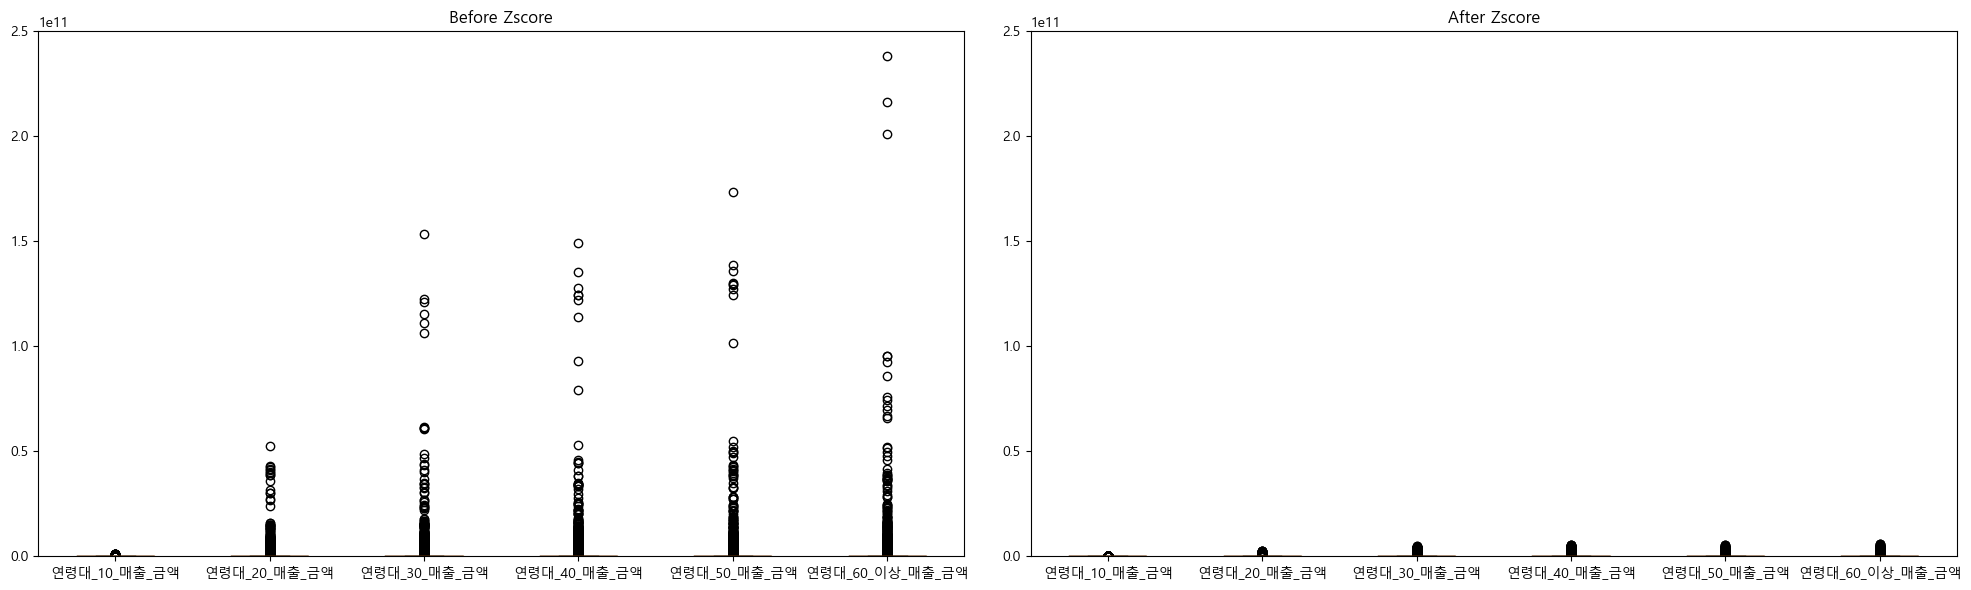

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

day = ['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액']
hour = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액']
gender = ['남성_매출_금액', '여성_매출_금액']
age = ['연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액']

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.boxplot(sale_store_n_col[age].values, labels=age)
plt.ylim(0, 2.5e11)
plt.title('Before Zscore')

plt.subplot(1, 2, 2)
plt.boxplot(sale_store_z[age].values, labels=age)
plt.ylim(0, 2.5e11)
plt.title('After Zscore')

plt.tight_layout()
plt.show()

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

scaler = StandardScaler()

X = np.array(sale_store_z.drop(columns=['폐업_점포_수', '개업_율', '폐업_률']))
y = np.array(sale_store_z['폐업_점포_수'])

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [34]:
print(input_n := len(X[0]))

57


In [35]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_n, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ANN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [36]:
epochs = 10
for epoch in range(epochs):
    total_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}')

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10, Loss: 0.4043910938652568


In [37]:
from sklearn.metrics import r2_score, mean_squared_error

model.eval()
with torch.no_grad():
    total_loss = 0
    num_samples = 0
    
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item() * inputs.size(0)
        num_samples += inputs.size(0)

    average_loss = total_loss / num_samples

print('Average Loss of the network on the test set: %.5f' % average_loss)

Average Loss of the network on the test set: 0.39102


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [38]:
from sklearn.metrics import r2_score, mean_squared_error

model.eval()
with torch.no_grad():
    y_true = []
    y_pred = []
    
    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_true.extend(labels.tolist())
        y_pred.extend(outputs.tolist())

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_true, y_pred)
print("R^2:", r2)

Mean Squared Error: 0.3767759180617461
R^2: 0.037772587075784236


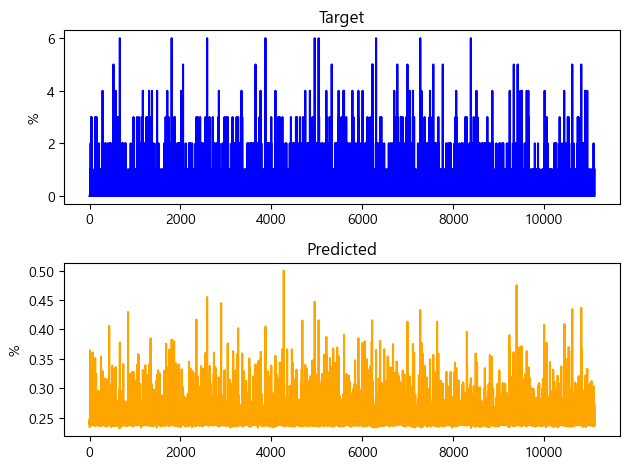

In [39]:
model.eval()
with torch.no_grad():
    predicted_values = []
    true_values = []
    
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted_values.extend(outputs.tolist())
        true_values.extend(labels.tolist())

import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

fig, axs = plt.subplots(2)

axs[0].plot(true_values, label='True Values', color='blue')
axs[0].set_title('Target')
axs[0].set_ylabel('%')

axs[1].plot(predicted_values, label='Predicted Values', color='orange')
axs[1].set_title('Predicted')
axs[1].set_ylabel('%')

plt.tight_layout()
plt.show()

In [29]:
X_train_scaled = X_train
X_test_scaled = X_test # 이미 스케일링 후 스플릿 함 (NN 한번 실행해야함)

In [41]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('RF')
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

Mean Squared Error: 0.2530972022310184
R^2: 0.35362889599223535


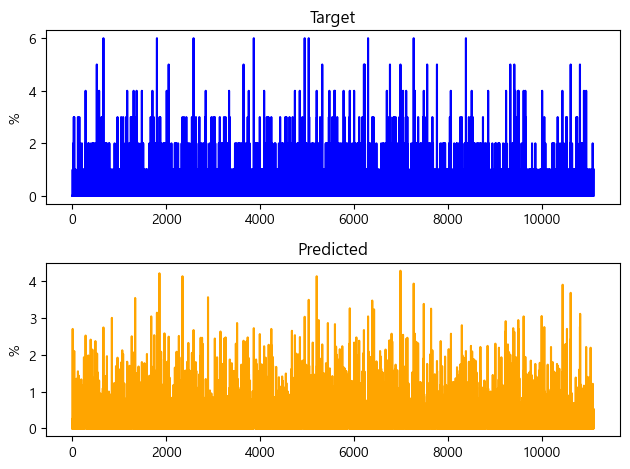

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

axs[0].plot(range(len(y_test)), y_test, color='blue', label='Target')
axs[0].set_title('Target')
axs[0].set_ylabel('%')

axs[1].plot(range(len(y_pred)), y_pred, color='orange', label='Predicted')
axs[1].set_title('Predicted')
axs[1].set_ylabel('%')

plt.tight_layout()
plt.show()

LR
Mean Squared Error: 0.24999337667669824
R^2: 0.36155558634087936


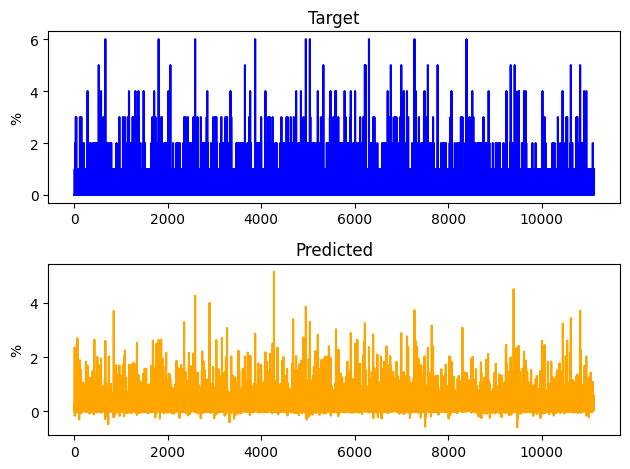

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('LR')
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

axs[0].plot(range(len(y_test)), y_test, color='blue', label='Target')
axs[0].set_title('Target')
axs[0].set_ylabel('%')

axs[1].plot(range(len(y_pred)), y_pred, color='orange', label='Predicted')
axs[1].set_title('Predicted')
axs[1].set_ylabel('%')

plt.tight_layout()
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train_scaled, y_train)
y_pred = polyreg.predict(X_test_scaled)

print('poly')
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

Mean Squared Error: 0.3015387368485496
R^2: 0.22991670978646217


In [45]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('DT')
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

Mean Squared Error: 0.48155811442965096
R^2: -0.22982493415189453


In [46]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('SVR')
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

Mean Squared Error: 0.28038738507126043
R^2: 0.28393399041631284


In [47]:
import xgboost as xgb
print('xgb')

model = xgb.XGBRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


print('xgb')
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

Mean Squared Error: 0.2620798065224689
R^2: 0.3306887141113224


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12347
[LightGBM] [Info] Number of data points in the train set: 44461, number of used features: 56
[LightGBM] [Info] Start training from score 0.250917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

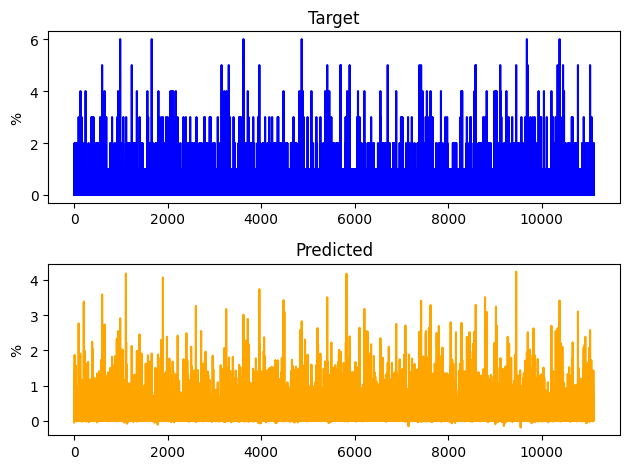

In [30]:
import lightgbm as lgb

model = lgb.LGBMRegressor(learning_rate= 0.1, max_depth= 3, min_child_samples=20, n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('lgb')
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

axs[0].plot(range(len(y_test)), y_test, color='blue', label='Target')
axs[0].set_title('Target')
axs[0].set_ylabel('%')

axs[1].plot(range(len(y_pred)), y_pred, color='orange', label='Predicted')
axs[1].set_title('Predicted')
axs[1].set_ylabel('%')

plt.tight_layout()
plt.show()

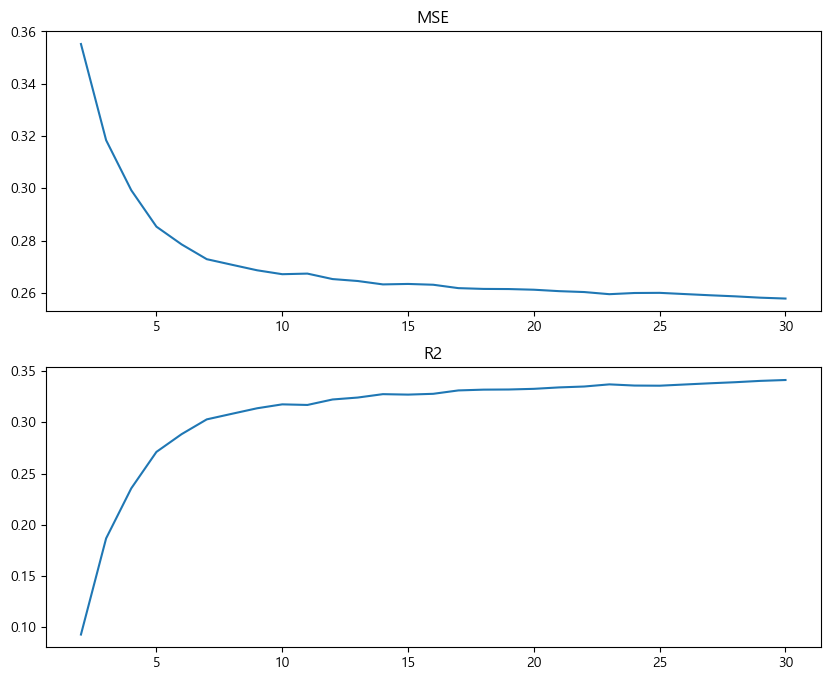

In [55]:
from sklearn.neighbors import KNeighborsRegressor

l=[]
m=[]
for i in (r := range(2, 31)):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    l.append(mse)
    m.append(r2)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(r, l)
axs[0].set_title('MSE')
axs[1].plot(r, m)
axs[1].set_title('R2')

print('KNR')
plt.show()

---

In [61]:
from sklearn.cluster import KMeans

scaler = StandardScaler()
sale_store_z_scaled = scaler.fit_transform(sale_store_z)
cluster_labels = model.labels_

model = KMeans(n_clusters=2, random_state=42, n_init=20)
model.fit(sale_store_z_scaled)

KMeans(n_clusters=2, n_init=20, random_state=42)

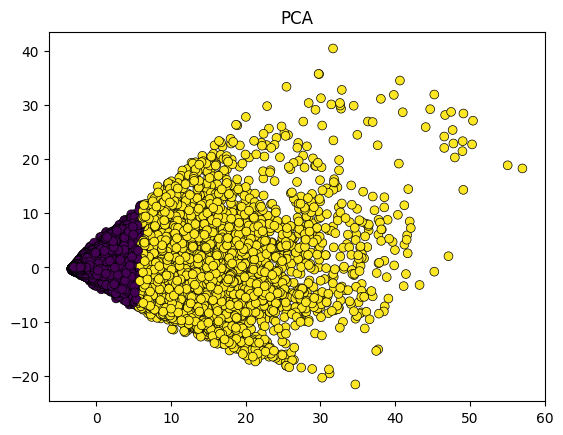

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(sale_store_z_scaled)

plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=cluster_labels, cmap='viridis', edgecolor='black', s=40, linewidths=0.5)
plt.title('PCA')
plt.show()

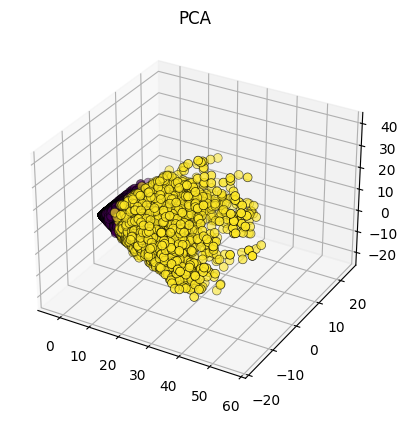

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
pca_3d = pca.fit_transform(sale_store_z_scaled)
cluster_labels = model.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 0], pca_3d[:, 2], pca_3d[:, 1], c=cluster_labels, edgecolor='black', s=40, linewidths=0.5, label='Target')
ax.set_title("PCA")
plt.show()